In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import torch
import numpy as np

from bgflow import IterativeSampler, SamplerStep, MCMCStep, SamplerState, GaussianProposal
import tqdm
from bgflow import LennardJonesPotential
from bgflow import  IterativeSampler, SamplerState, MCMCStep
from src.energies.lennardjones_energy import LennardJonesEnergy

import numpy as np
import glob

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [31]:
for temp in [1.0]:
    path_pattern = f"/network/scratch/t/tara.akhoundsadegh/gmm_samples/samples_{temp}*"

    # try catch permission error

    files = sorted(glob.glob(path_pattern))
    print(f"Found {len(files)} files for temperature {temp}")
    arrays = []
    for file in files:
        try :
            arrays.append(np.load(file))
        except PermissionError:
            print(f"Permission error for file {file}")
            break

    samples = np.concatenate(arrays)
    print(f"Concatenated array shape: {samples.shape}")

Found 10 files for temperature 1.0
Concatenated array shape: (100000, 2)


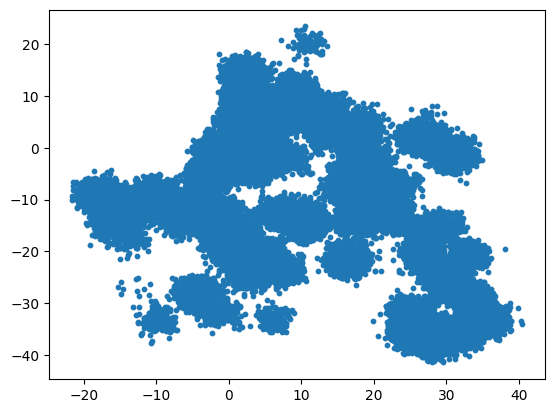

In [32]:
plt.scatter(samples[:, 0], samples[:, 1], s=10)

### Target Distribution

In [5]:
n_particles = 13
spatial_dim = 3
dimensionality = spatial_dim * n_particles

In [6]:
import numpy as np
import glob


for temp in [0.9]:
    # path_pattern = f"/network/scratch/a/alexander.tong/lj13_samples/samples_v8_{temp}*"
    path_pattern = f"/home/mila/t/tara.akhoundsadegh/scratch/lj13_samples/samples_0.1_noise_{temp}*"

    # try catch permission error

    files = sorted(glob.glob(path_pattern))
    print(f"Found {len(files)} files for temperature {temp}")
    arrays = []
    for file in files:
        try :
            arrays.append(np.load(file))
        except PermissionError:
            print(f"Permission error for file {file}")
            break

    samples = np.concatenate(arrays)
    print(f"Concatenated array shape: {samples.shape}")
    samples = samples.reshape(-1, dimensionality)


    idxs = np.random.permutation(samples.shape[0])
    train_idx = idxs[:10000]
    val_idx = idxs[10000: 20000]
    test_idx = idxs[20000: 30000]


    samples_train = samples[train_idx]
    samples_val = samples[val_idx]
    samples_test = samples[test_idx]

    # if directory does not exist, create it
    import os
    temp = temp.__float__()
    data_path = f"../../data/LJ13_temp_{temp}"
    if not os.path.exists(data_path):
        os.makedirs(data_path)
    else:
        print(f"Directory {data_path} already exists. Overwriting data.")

    np.save(data_path + f"/train_split_LJ13-1000.npy", samples_train)
    np.save(data_path + f"/val_split_LJ13-1000.npy", samples_val)
    np.save(data_path + f"/test_split_LJ13-1000.npy", samples_test)
    print(f"Saved data for temperature {temp} to {data_path}")


Found 100 files for temperature 0.9
Concatenated array shape: (1000000, 13, 3)
Saved data for temperature 0.9 to ../../data/LJ13_temp_0.9


In [61]:
samples.shape

(400000, 39)

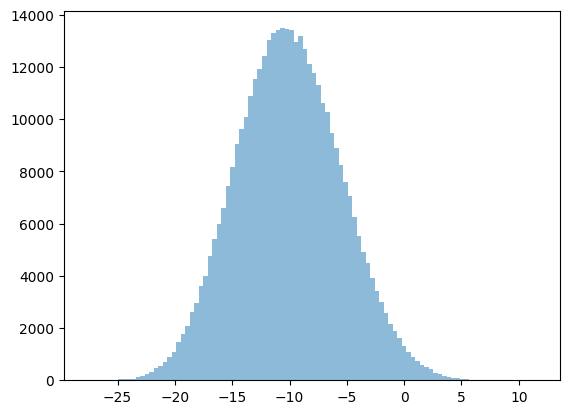

In [66]:
plt.hist(-target_temp2(torch.tensor(samples)), bins=100, alpha=0.5, label="target");

In [62]:
# import numpy as np
# import glob

# T = 4
# noise_std = 0.05

# samples = {}

# for noise_std in [0.1]:
#     # path_pattern = f"/network/scratch/a/alexander.tong/lj13_samples/samples_v7_{temp}*"
#     path_pattern = f"/home/mila/t/tara.akhoundsadegh/scratch/lj13_samples/samples_{noise_std}_noise_{T}*"
#     path_pattern = f"/home/mila/t/tara.akhoundsadegh/scratch/lj13_samples/samples_v4_{T}*"
    
#     # Find all matching files
#     files = sorted(glob.glob(path_pattern))

#     arrays = [np.load(file) for file in files]
#     s = np.concatenate(arrays, axis=0)

#     print(f"Concatenated array shape: {s.shape}")
#     # samples = torch.tensor(samples, dtype=torch.float32).to(device)
#     s = s.reshape(-1, dimensionality)
#     samples[noise_std] = s

# # Set the prefix and axis for concatenation
# # path_pattern = f"/home/mila/t/tara.akhoundsadegh/scratch/lj13_samples/samples_v4_{T}*"
# # path_pattern = f"/home/mila/t/tara.akhoundsadegh/scratch/lj13_samples/samples_{noise_std}_noise_{T}*"
# # path_pattern = f"/network/scratch/a/alexander.tong/lj13_samples/samples_v7_{T}*"

In [67]:
from src.energies.lennardjones_energy import LennardJonesEnergy, lennard_jones_energy_torch
T = 0.6
T = T.__float__()
target = LennardJonesEnergy(
    dimensionality=dimensionality,
    n_particles=n_particles,
    device=device,
    data_path= "../../data/",
    smooth=False,
    temperature=T
    )


target_temp1 = LennardJonesEnergy(
    dimensionality=dimensionality,
    n_particles=n_particles,
    device=device,
    data_path= "../../data/",
    smooth=False,
    temperature=1.0
    )

In [68]:
target_temp2 = LennardJonesEnergy(
    dimensionality=dimensionality,
    n_particles=n_particles,
    device=device,
    data_path= "../../data/",
    smooth=False,
    temperature=2.0
    )

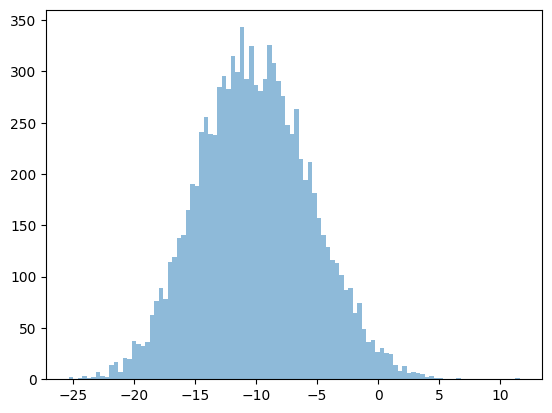

In [69]:
# plt.hist(target(target.test_set).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=4");
plt.hist(-target_temp2(target_temp2.test_set).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=3");


In [6]:
T = 0.7
T = T.__float__()
target = LennardJonesEnergy(
    dimensionality=dimensionality,
    n_particles=n_particles,
    device=device,
    data_path= "../../data/",
    smooth=False,
    temperature=T
    )

In [7]:
plt.hist(-target(target.test_set).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=0.7");

RuntimeError: cannot reshape tensor of 0 elements into shape [0, -1] because the unspecified dimension size -1 can be any value and is ambiguous

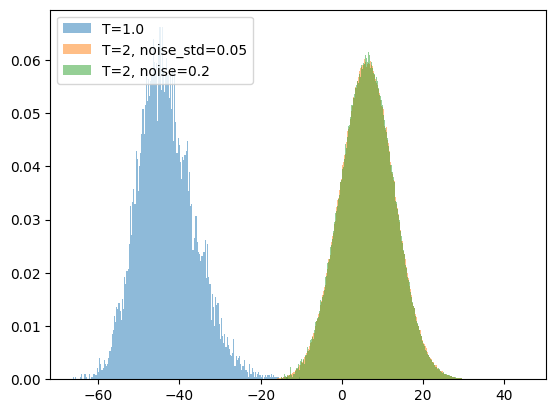

In [54]:
#plt.hist(-target(target.test_set).cpu().detach().numpy(), bins=200, alpha=0.5, density=True)
# 
plt.hist(-target_temp1(target_temp1.test_set).cpu().detach().numpy(), bins=200, alpha=0.5, density=True, label="T=1.0")
samples_energy = target(torch.tensor(samples[0.05], dtype=torch.float32).to(device)).cpu().detach().numpy()
plt.hist(-samples_energy, bins=300, density=True, alpha=0.5, label=f"T=2, noise_std=0.05");

samples_energy = target(torch.tensor(samples[0.2], dtype=torch.float32).to(device)).cpu().detach().numpy()
plt.hist(-samples_energy, bins=300, density=True, alpha=0.5, label=f"T=2, noise=0.2");


# samples_energy = target(torch.tensor(samples[4], dtype=torch.float32).to(device)).cpu().detach().numpy()
# plt.hist(-samples_energy, bins=300, density=True, alpha=0.5, label=f"T=4");

plt.legend()
plt.show()

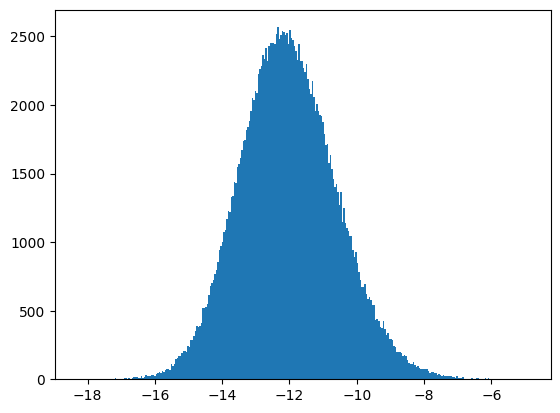

In [8]:
samples_energy = target(torch.tensor(samples, dtype=torch.float32).to(device)).cpu().detach().numpy()
plt.hist(-samples_energy, bins=300);
# plt.xlim(-80, 40)

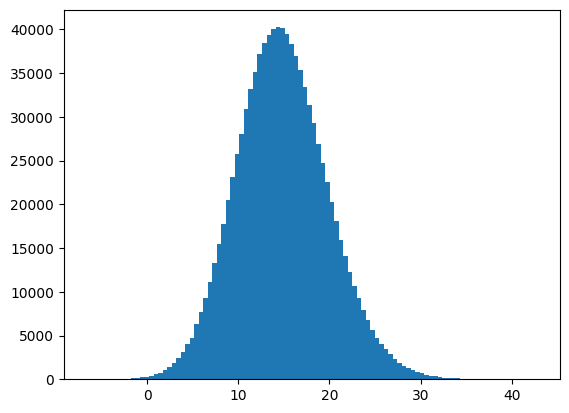

In [22]:
samples_energy = target(torch.tensor(samples, dtype=torch.float32).to(device)).cpu().detach().numpy()
plt.hist(-samples_energy, bins=100);


In [9]:
temp = 0.5

path = f"../../data/LJ13_temp_{temp}/train_split_LJ13-1000.npy"
path_alex = f"../../data/LJ13_Alex_temp_{temp}/train_split_LJ13-1000.npy"
samples = np.load(path)
samples = torch.tensor(samples, dtype=torch.float32).to(device)

samples_alex = np.load(path_alex)
samples_alex = torch.tensor(samples_alex, dtype=torch.float32).to(device)

n_particles = 13
spatial_dim = 3
dimensionality = spatial_dim * n_particles
target = LennardJonesEnergy(
    dimensionality=dimensionality,
    n_particles=n_particles,
    device=device,
    data_path= "../../data/",
    smooth=False,
    temperature=temp
    )


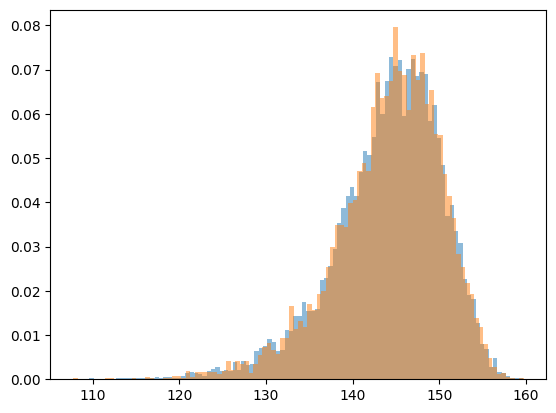

In [10]:
plt.hist(target(samples).detach().cpu().numpy(), bins=100, alpha=0.5, density=True);
plt.hist(target(samples_alex).detach().cpu().numpy(), bins=100, alpha=0.5, density=True);

In [11]:
# perform unadjusted Langevin sampling

def langevin(x, energy_fn, dt):
    noise = torch.randn_like(x) 
    grad = torch.autograd.grad(energy_fn(x).sum(), x)[0]
    return (x + dt * grad + np.sqrt(2 * dt) * noise)


def langevin_sampling(x0, energy_fn, dt, n_steps):
    x = x0
    samples = [x0]
    for _ in range(n_steps):
        x = langevin(x, energy_fn, dt)
        samples.append(x)
    return torch.stack(samples)

x0 = samples[:2000]
x0.requires_grad = True
x_langevin = langevin_sampling(x0, target, 1e-4, 10000)

x0_alex = samples_alex[:2000]
x0_alex.requires_grad = True
x_langevin_alex = langevin_sampling(x0_alex, target, 1e-4, 10000)

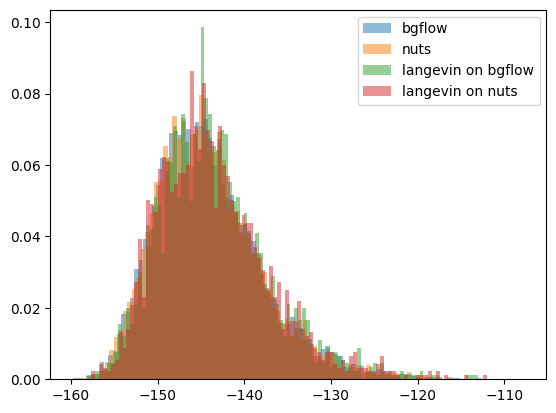

In [12]:
plt.hist(-target(samples).detach().cpu().numpy(), bins=100, alpha=0.5, density=True, label="bgflow");
plt.hist(-target(samples_alex).detach().cpu().numpy(), bins=100, alpha=0.5, density=True, label="nuts");
plt.hist(-target(x_langevin[-1]).detach().cpu().numpy(), bins=100, alpha=0.5, density=True, label="langevin on bgflow");
plt.hist(-target(x_langevin_alex[-1]).detach().cpu().numpy(), bins=100, alpha=0.5, density=True, label="langevin on nuts");
plt.legend()

In [6]:
data_path = "/home/mila/t/tara.akhoundsadegh/feynman-kac-diffusion/runner/dem/logs/eval/multiruns/2025-01-20_18-44-52/0/samples_8192.pt"
samples = torch.load(data_path)

/tmp/ipykernel_3640602/4049315480.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  samples = torch.load(data_path)


In [7]:
mask = target(samples).detach().cpu().numpy() <-100

In [8]:
samples = samples[~mask]

In [17]:
s = s.reshape(-1, 39)

In [26]:
mask = target(s).detach().cpu().numpy() <-100
s = s[~mask]

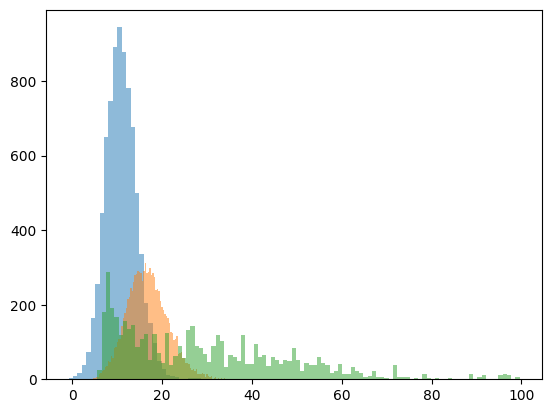

In [27]:
plt.hist(-target(samples).detach().cpu().numpy(), bins=100, alpha=0.5);
plt.hist(-target(target.test_set).detach().cpu().numpy(), bins=100,  alpha=0.5);
plt.hist(-target(s[:5000]).detach().cpu().numpy(), bins=100, alpha=0.5);

In [11]:
from src.energies.lennardjones_energy import LennardJonesPotential

energy = LennardJonesPotential(dim=39, n_particles=13, two_event_dims=True)

n_samples = 500
n_burnin = 10

# sampler_state = SamplerState(samples=[torch.randn(n_samples, 1, 13, 3)])
sampler_state = SamplerState(samples=samples.reshape(-1, 1, 13, 3)[:500])
mcmc_step = MCMCStep(energy,
                     proposal=GaussianProposal(noise_std=0.1),
                     target_temperatures=4.0)
sampler = IterativeSampler(sampler_state,
                           sampler_steps=[mcmc_step],
                           stride=100,
                           n_burnin=n_burnin,
                           progress_bar=tqdm.tqdm,
                           return_hook=lambda samples: [samples[0][:,0]])

100%|██████████| 10/10 [00:12<00:00,  1.29s/it]


In [19]:
from fab.target_distributions import gmm
class GMMPotential():
    def __init__(self,
                 dim=2,
                 n_mixes=40,
                 mean=None,
                 scale=None,
                 cat_probs=None,
                 loc_scaling=40,
                 log_var_scaling=1.0,
                 use_gpu=False,
                 true_expectation_estimation_n_samples=int(1e5),
                 temperature=1.0,
    ):
        self.temperature = temperature
        torch.manual_seed(0) 
        self.gmm = gmm.GMM(
            dim=dim,
            n_mixes=n_mixes,
            mean=mean,
            scale=scale,
            cat_probs=cat_probs,
            loc_scaling=loc_scaling,
            log_var_scaling=log_var_scaling,
            use_gpu=use_gpu,
            true_expectation_estimation_n_samples=true_expectation_estimation_n_samples,
        )

    def energy(self, x):
        return - self.gmm.log_prob(x)/ temperature

    def _log_prob(self, x):
        return self.gmm.log_prob(x)/ temperature

temperature = 1.0

energy = GMMPotential(dim=2, temperature=temperature)

sampler_state = SamplerState(samples=[torch.randn(1, 2)])
print("Starting sampling at temperature", temperature)

mcmc_step = MCMCStep(energy,
                    proposal=GaussianProposal(noise_std=0.1 * 50),
                    target_temperatures=temperature)

sampler = IterativeSampler(sampler_state,
                        sampler_steps=[mcmc_step],
                        stride=100,
                        n_burnin=1000,
                        return_hook=lambda samples: [samples[0][:,0]])
samples = sampler.sample(1000)
print("Finished sampling. Samples have shape ", samples.shape)


CAT PROBS None
Starting sampling at temperature 1.0
Finished sampling. Samples have shape  torch.Size([1000, 2])


In [23]:
samples = sampler.sample(2000)

In [20]:

from src.energies.gmm_energy import GMM
target = GMM(dimensionality=2,
                   n_mixes=40,
                   loc_scaling= 40.0,
                   log_var_scaling=1.0,
                   device=device,
                   should_unnormalize=True,
                   temperature=1.0
                   )

CAT PROBS None


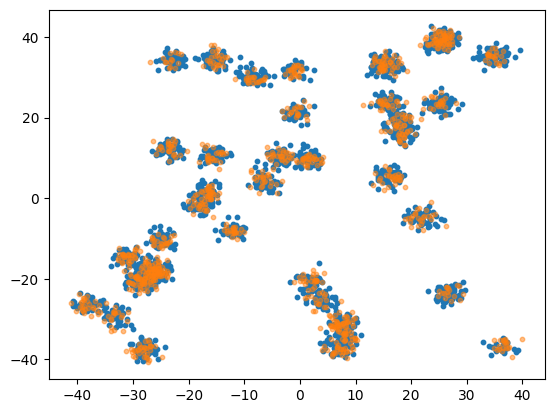

In [24]:
plt.scatter(samples[:, 0], samples[:, 1], s=10)

a = target.sample_test_set(1000).detach().cpu().numpy()
plt.scatter(a[:, 0], a[:, 1], s=10, alpha=0.5)


In [12]:
sampler.sample(n_samples)

100%|██████████| 500/500 [12:12<00:00,  1.46s/it]


tensor([[[[-1.6665e+00,  1.9954e+00,  1.2231e+00],
          [ 5.1645e-01, -2.2807e-01, -3.9126e+00],
          [ 1.7816e+00,  3.4912e+00,  7.4698e-01],
          ...,
          [-4.1651e-02,  4.9208e-01,  4.2690e-01],
          [-6.4348e-01,  4.1625e+00, -1.2480e+00],
          [ 2.6971e-01,  2.3093e+00,  1.3558e+00]],

         [[ 1.3644e+00,  5.5303e-01,  3.5495e+00],
          [ 1.4198e-01,  2.6719e+00, -2.9936e+00],
          [-1.3808e+00,  1.6080e+00, -2.3813e+00],
          ...,
          [ 3.1690e+00,  4.4463e+00, -1.4118e+00],
          [ 3.1289e+00, -4.8106e+00, -2.7063e+00],
          [ 1.0892e+00, -1.8767e+00, -9.3912e-01]],

         [[-2.1691e+00, -1.6375e+00,  2.6207e+00],
          [-5.6925e-01,  2.1540e+00, -1.2778e+00],
          [-5.2161e-01,  2.8676e+00,  2.8170e-01],
          ...,
          [ 3.5087e+00,  4.1531e+00,  2.0741e+00],
          [-8.3371e-01,  3.4034e+00, -9.3672e-01],
          [ 4.8981e-01, -8.6689e-02, -1.8994e+00]],

         ...,

         [[-1.32

In [5]:
for temp in [1]:
    path_pattern = f"/network/scratch/t/tara.akhoundsadegh/lj55_samples/samples_0.1_noise_{temp}*"

    # try catch permission error

    files = sorted(glob.glob(path_pattern))
    print(f"Found {len(files)} files for temperature {temp}")
    arrays = []
    for file in files:
        try :
            arrays.append(np.load(file))
        except PermissionError:
            print(f"Permission error for file {file}")
            break

    samples = np.concatenate(arrays)
    print(f"Concatenated array shape: {samples.shape}")

Found 100 files for temperature 1
Concatenated array shape: (1000000, 55, 3)


In [10]:
target = LennardJonesEnergy(
    dimensionality=165,
    n_particles=55,
    device=device,
    data_path= "../../data/",
    smooth=False,
    temperature=1.0
    )

In [17]:
samples = samples[:5000].reshape(-1, 165)
samples_energy = target(torch.tensor(samples, dtype=torch.float32).to(device)).cpu().detach().numpy()

In [18]:
samples_energy

array([60.828247, 60.82823 , 60.82823 , ..., 67.48624 , 67.48622 ,
       67.48624 ], dtype=float32)

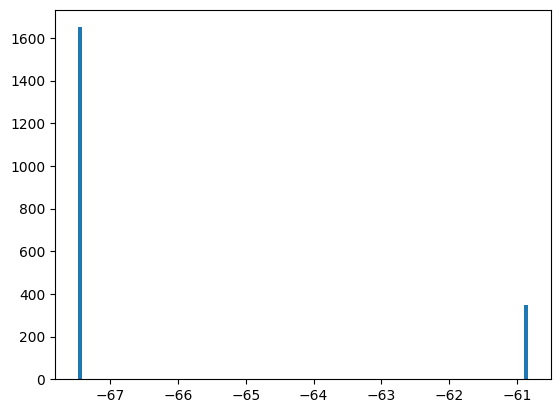

In [19]:
plt.hist(-samples_energy, bins=100);